# MegaMart Customer Segmentation Analysis

TEAM GIRLS


Sophia Gabriela Martinez Albarrán

Sibyla Vera Avila

Regina Pérez Vázquez

## Section 1: Project Setup & Data Loading



**Import all necessary libraries (pandas, numpy, sklearn, scipy, matplotlib, seaborn).**

In [35]:
import warnings
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [36]:
warnings.filterwarnings("ignore")

import logging
logging.basicConfig(level=logging.INFO, format="%(levelname)s: %(message)s")
logger = logging.getLogger(__name__)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

logger.info("Libraries imported successfully")

INFO: Libraries imported successfully


**Load the retail_customer_data.csv file.**


In [37]:
df = pd.read_csv('retail_customer_data-1.csv')

In [38]:
# Log how many customer records were loaded into the DataFrame

logger.info(f"Loaded {len(df)} customer records")

# Show the first 5 rows to quickly check that the data looks correct
print("\nFirst 5 Customers")
print(df.head())

# Display a statistical summary of the numerical columns in the dataset
print("\nDataset Summary")
print(df.describe())

INFO: Loaded 3000 customer records



First 5 Customers
  customer_id  monthly_transactions  avg_basket_size  total_spend  \
0   CUST_0001                   1.8              3.0       527.04   
1   CUST_0002                   5.4              4.5      1137.72   
2   CUST_0003                   2.9              4.4       670.28   
3   CUST_0004                  12.0             22.8      6359.35   
4   CUST_0005                   2.2             17.6      4058.48   

   avg_session_duration  email_open_rate  product_views_per_visit  \
0                  38.1             0.95                     17.3   
1                  20.0             0.00                     16.1   
2                  64.3             0.52                     36.9   
3                  37.9             0.17                     42.2   
4                  22.5             0.53                     18.4   

   return_rate  customer_tenure_months  recency_days  
0         0.00                      23            33  
1         0.41                       1   

**Perform an initial inspection: .head(), .info(), .describe().**

In [39]:
df.head

<bound method NDFrame.head of      customer_id  monthly_transactions  avg_basket_size  total_spend  \
0      CUST_0001                   1.8              3.0       527.04   
1      CUST_0002                   5.4              4.5      1137.72   
2      CUST_0003                   2.9              4.4       670.28   
3      CUST_0004                  12.0             22.8      6359.35   
4      CUST_0005                   2.2             17.6      4058.48   
...          ...                   ...              ...          ...   
2995   CUST_2996                   2.5              3.4       361.24   
2996   CUST_2997                   8.9              6.6      1267.59   
2997   CUST_2998                   4.4              2.9      1004.42   
2998   CUST_2999                   8.1              5.9      1143.57   
2999   CUST_3000                   7.5              6.1      1241.33   

      avg_session_duration  email_open_rate  product_views_per_visit  \
0                     38.1       

In [40]:
df.info

<bound method DataFrame.info of      customer_id  monthly_transactions  avg_basket_size  total_spend  \
0      CUST_0001                   1.8              3.0       527.04   
1      CUST_0002                   5.4              4.5      1137.72   
2      CUST_0003                   2.9              4.4       670.28   
3      CUST_0004                  12.0             22.8      6359.35   
4      CUST_0005                   2.2             17.6      4058.48   
...          ...                   ...              ...          ...   
2995   CUST_2996                   2.5              3.4       361.24   
2996   CUST_2997                   8.9              6.6      1267.59   
2997   CUST_2998                   4.4              2.9      1004.42   
2998   CUST_2999                   8.1              5.9      1143.57   
2999   CUST_3000                   7.5              6.1      1241.33   

      avg_session_duration  email_open_rate  product_views_per_visit  \
0                     38.1     

In [41]:
df.describe

<bound method NDFrame.describe of      customer_id  monthly_transactions  avg_basket_size  total_spend  \
0      CUST_0001                   1.8              3.0       527.04   
1      CUST_0002                   5.4              4.5      1137.72   
2      CUST_0003                   2.9              4.4       670.28   
3      CUST_0004                  12.0             22.8      6359.35   
4      CUST_0005                   2.2             17.6      4058.48   
...          ...                   ...              ...          ...   
2995   CUST_2996                   2.5              3.4       361.24   
2996   CUST_2997                   8.9              6.6      1267.59   
2997   CUST_2998                   4.4              2.9      1004.42   
2998   CUST_2999                   8.1              5.9      1143.57   
2999   CUST_3000                   7.5              6.1      1241.33   

      avg_session_duration  email_open_rate  product_views_per_visit  \
0                     38.1   

**Brief summary**

The dataset contains information on 3,000 customers, each identified by unique customer ID. It includes 9 behavioral and transactional variables such as monthly transactions, average basket size, total spend, session duration, email open rate, and product views per visit, among other engagement metrics. 

The data appears to be clean, with no missing values of formatting issues, making it a solid foundation for customer segmentation.

## Section 2: Exploratory Data Analysis (EDA)



**Variable Distributions**


INFO: Saved distribution plots to customer_distributions.png


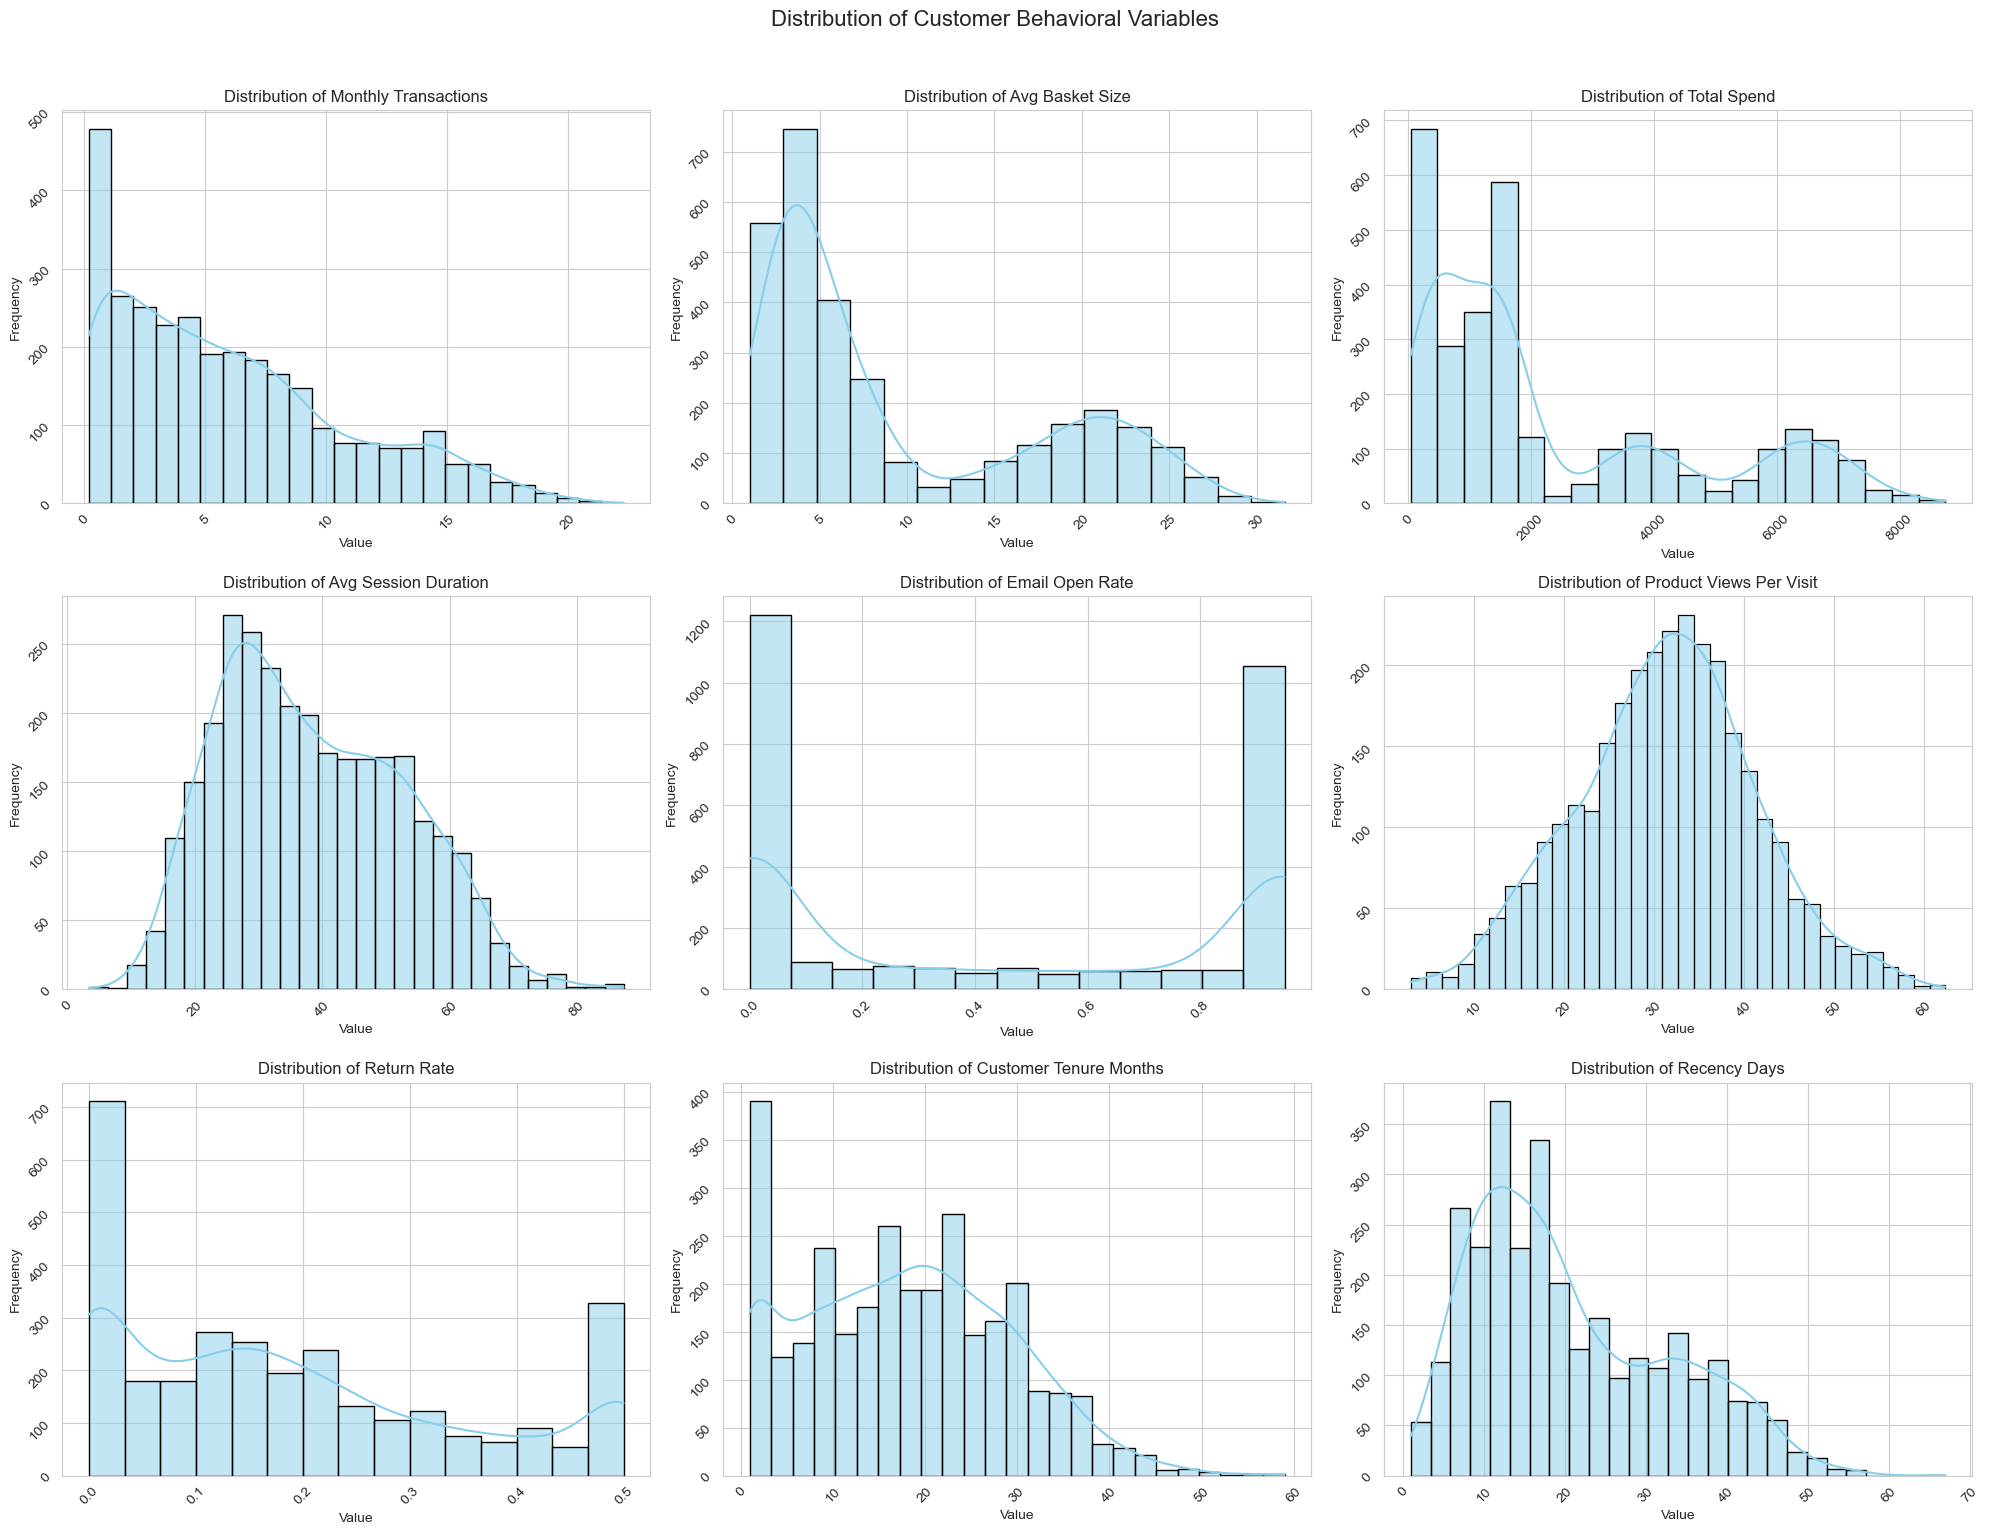

In [42]:
# Distribution plots for each variable
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Distribution of Customer Behavioral Variables", fontsize=16, y=1.02)

variables = ['monthly_transactions', 'avg_basket_size', 'total_spend',
              'avg_session_duration', 'email_open_rate', 'product_views_per_visit',
              'return_rate', 'customer_tenure_months', 'recency_days']

for idx, var in enumerate(variables):
    row = idx // 3
    col_idx = idx % 3
    sns.histplot(data=df, x=var, kde=True, ax=axes[row, col_idx], color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {var.replace("_", " ").title()}')
    axes[row, col_idx].set_xlabel("Value")
    axes[row, col_idx].set_ylabel("Frequency")
    axes[row, col_idx].tick_params(labelrotation=45)

# Hide unused subplots
for idx in range(len(variables), 9):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].axis('off')

plt.tight_layout()
plt.savefig("customer_distributions.png", dpi=300, bbox_inches='tight')
logger.info("Saved distribution plots to customer_distributions.png")
plt.show()


**Correlation Analysis**

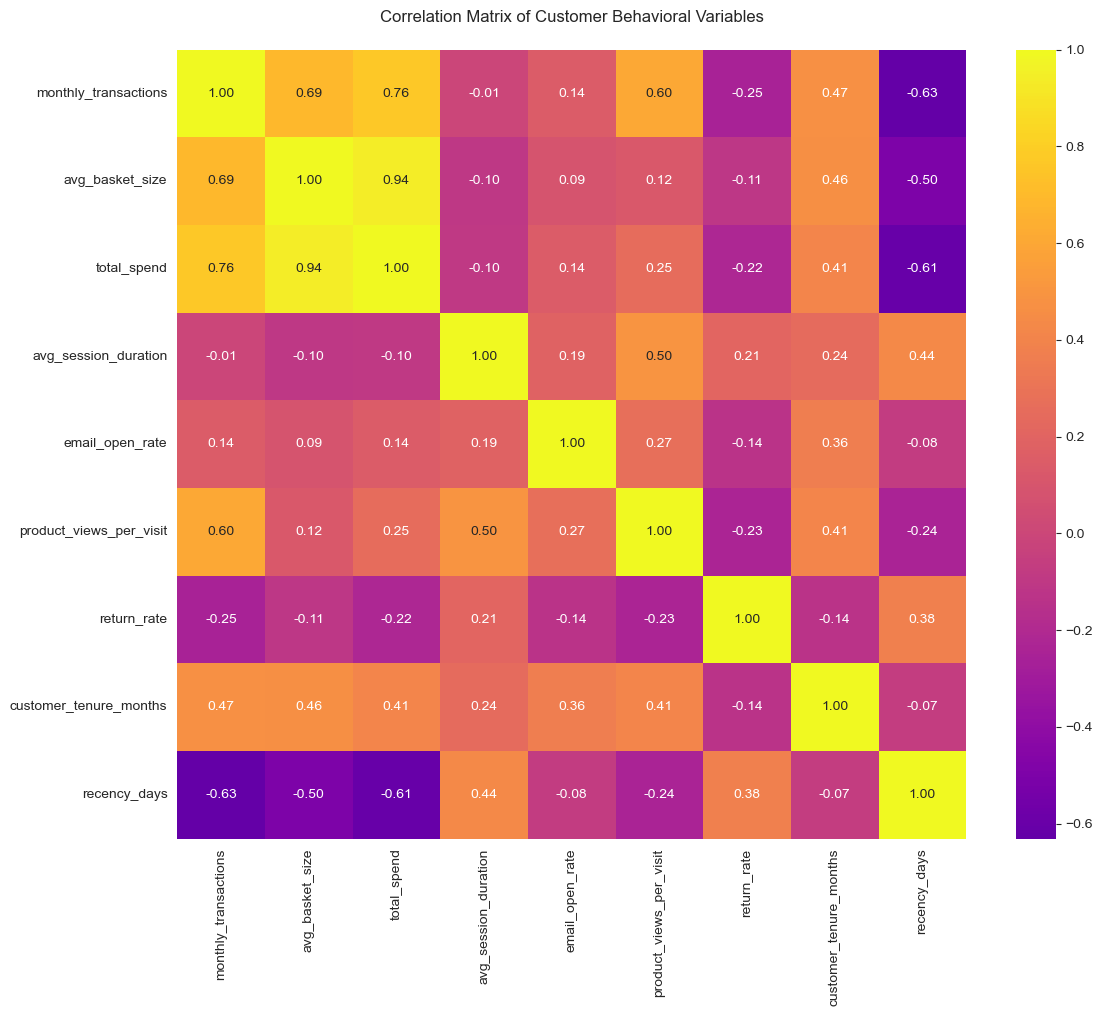


 Strongest Correlations 
avg_basket_size <-> total_spend: 0.941
monthly_transactions <-> total_spend: 0.764
monthly_transactions <-> avg_basket_size: 0.691
monthly_transactions <-> recency_days: -0.632
total_spend <-> recency_days: -0.612


In [43]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, 
            annot=True,  
            fmt='.2f',  
            cmap='plasma',  
            center=0,  
            square=True)

plt.title("Correlation Matrix of Customer Behavioral Variables", pad=20)
plt.tight_layout()

plt.savefig("correlation_matrix.png", dpi=300, bbox_inches='tight')


plt.show()

print("\n Strongest Correlations ")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append((
            correlation_matrix.columns[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i, j]
        ))

corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in corr_pairs_sorted[:5]:
    print(f"{var1} <-> {var2}: {corr:.3f}")


**Outlier Detection**


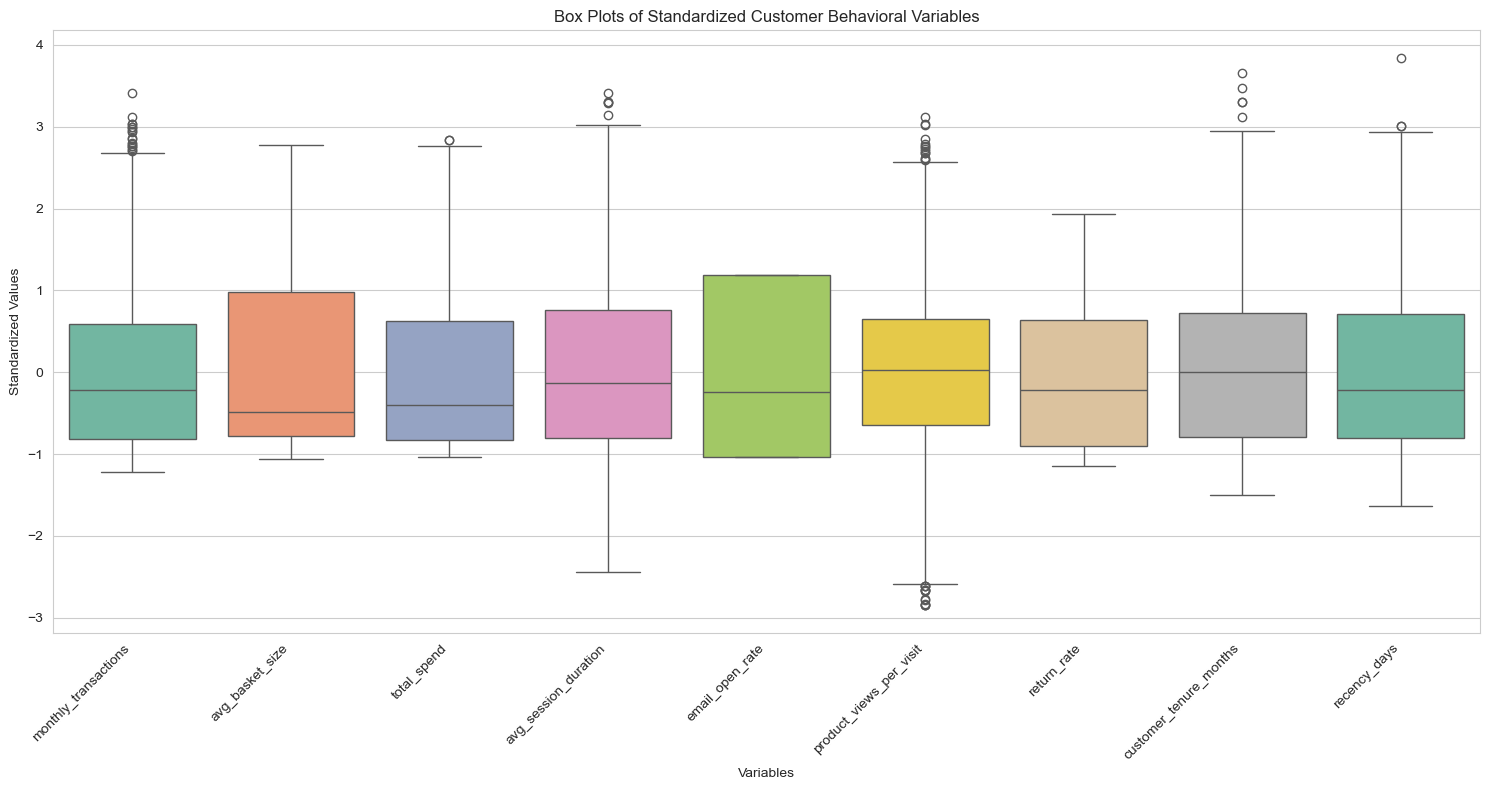

In [44]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[variables])

df_scaled = pd.DataFrame(scaled, columns=variables)

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_scaled, palette="Set2")

plt.xticks(rotation=45, ha='right')
plt.title('Box Plots of Standardized Customer Behavioral Variables')
plt.xlabel('Variables')
plt.ylabel('Standardized Values')
plt.tight_layout()
plt.show()


**Scatter Plots**

**Total Spend vs Monthly Transactions**

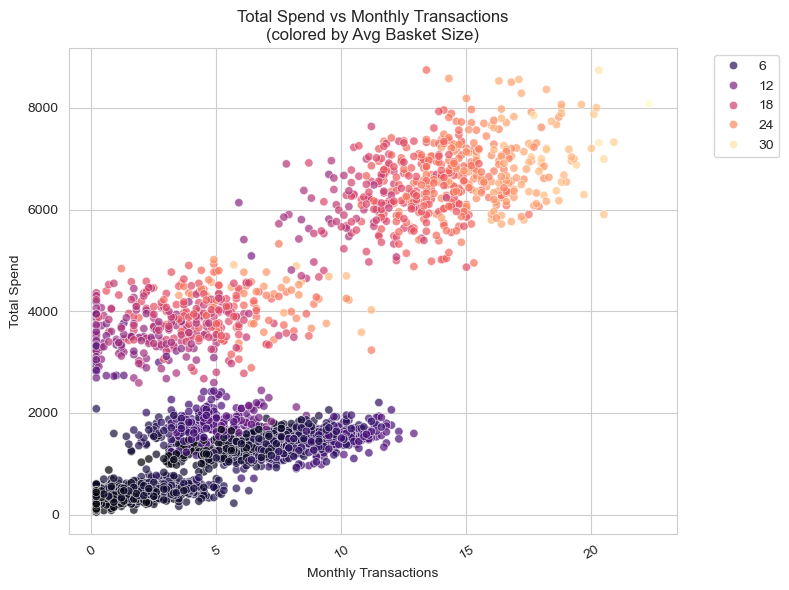

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='monthly_transactions',
    y='total_spend',
    hue='avg_basket_size',
    palette='magma',
    alpha=0.7
)
plt.title('Total Spend vs Monthly Transactions\n(colored by Avg Basket Size)')
plt.xlabel('Monthly Transactions')
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Total Spend vs Product Views Per Visit**

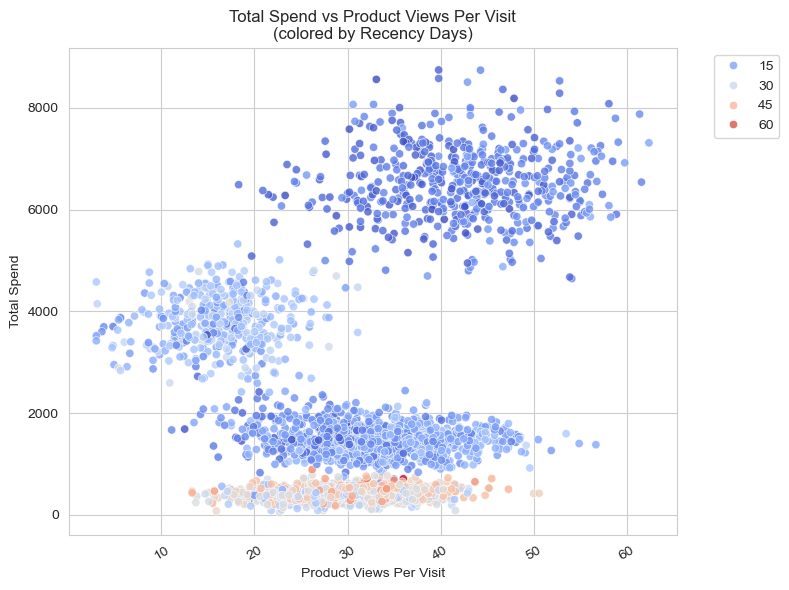

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='product_views_per_visit',
    y='total_spend',
    hue='recency_days',
    palette='coolwarm',
    alpha=0.8
)
plt.title('Total Spend vs Product Views Per Visit\n(colored by Recency Days)')
plt.xlabel('Product Views Per Visit')
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Product Views vs Session Duration**

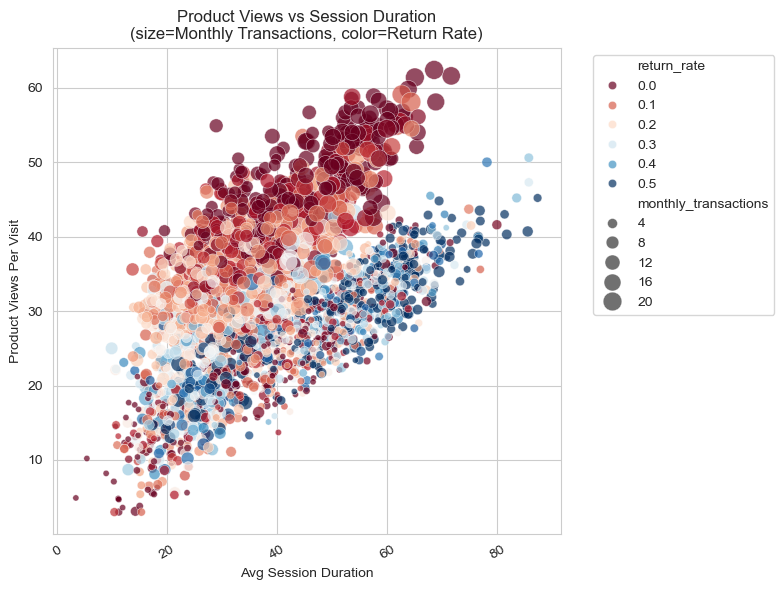

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='avg_session_duration',
    y='product_views_per_visit',
    size='monthly_transactions',
    sizes=(20, 200),
    hue='return_rate',
    palette='RdBu',
    alpha=0.7
)
plt.title('Product Views vs Session Duration\n(size=Monthly Transactions, color=Return Rate)')
plt.xlabel('Avg Session Duration')
plt.ylabel('Product Views Per Visit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Observations** 

We chose these variables for the scatter plots because they help us capture the main behaviors that matter for understanding customer value—how much they spend, how often they shop, and how engaged they are. By comparing total spend with things like monthly transactions and product views per visit, we can quickly see how shopping frequency and browsing activity relate to overall spending. Adding details like average basket size, recency, or return rate as colors or bubble sizes also helps reveal deeper patterns, such as whether frequent buyers also spend more per purchase or whether recent activity leads to higher spending.

When looking at the rest of the visualizations, some general patterns stand out. Many variables—like transactions, spend, and basket size—are skewed, meaning most customers behave moderately while only a smaller group shows very high activity or spending. This is pretty typical in retail.

The correlation heatmap supports this idea: the spending-related variables move together, showing that people who shop more often also tend to spend more. Meanwhile, things like email open rate or return rate don’t relate as strongly to spending, suggesting they capture different behaviors.

The box plots also help identify outliers, especially in spending and session duration. These could be heavy shoppers or highly active customers who might form specific segments later on.

Finally, the multivariate scatter plots show that engagement—such as longer sessions or more product views—usually grows with spending. Recency and return rate add extra context: more recent customers tend to spend more, while those with higher return rates show more irregular behavior.


## Section 3: Data Preprocessing



**Check for Missing Data**

In [48]:
print("Missing values per column:")
print(df.isnull().sum())
print("\nTotal missing values in the dataset:", df.isnull().sum().sum())

Missing values per column:
customer_id                0
monthly_transactions       0
avg_basket_size            0
total_spend                0
avg_session_duration       0
email_open_rate            0
product_views_per_visit    0
return_rate                0
customer_tenure_months     0
recency_days               0
dtype: int64

Total missing values in the dataset: 0


**Standardization**


In [49]:
# Standardize features
features_to_scale = ['monthly_transactions', 'avg_basket_size', 'total_spend', 
                     'avg_session_duration', 'email_open_rate', 'product_views_per_visit',
                     'return_rate', 'customer_tenure_months', 'recency_days']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(df[features_to_scale])

# Convert back to DataFrame for easier handling
df_standardized = df.copy()
df_standardized[features_to_scale] = X_standardized

logger.info("Data standardized: mean approx 0, std approx 1 for all variables")

print("\nStandardized Data Summary")
print(df_standardized[features_to_scale].describe())



INFO: Data standardized: mean approx 0, std approx 1 for all variables



Standardized Data Summary
       monthly_transactions  avg_basket_size   total_spend  \
count          3.000000e+03     3.000000e+03  3.000000e+03   
mean           1.290819e-16    -4.263256e-17  2.842171e-17   
std            1.000167e+00     1.000167e+00  1.000167e+00   
min           -1.216830e+00    -1.065978e+00 -1.030908e+00   
25%           -8.189887e-01    -7.770313e-01 -8.257765e-01   
50%           -2.117565e-01    -4.880849e-01 -4.053880e-01   
75%            5.839270e-01     9.849136e-01  6.249629e-01   
max            3.410697e+00     2.778266e+00  2.837726e+00   

       avg_session_duration  email_open_rate  product_views_per_visit  \
count          3.000000e+03     3.000000e+03             3.000000e+03   
mean           7.460699e-17    -8.526513e-17             4.973799e-17   
std            1.000167e+00     1.000167e+00             1.000167e+00   
min           -2.445025e+00    -1.038395e+00            -2.846642e+00   
25%           -7.983336e-01    -1.038395e+00     

**Why standardization is necessary for clustering?**

Standardization is important because it puts all variables on the same scale before running clustering algorithms like K-means.

Without it, variables with large values (such as total_spend) would dominate the analysis, making the results unfair. By standardiziing, each feature contrinutes equally, allowing the algorithm to group customers based on genuine behavioral similarities rather than differences in numerical ranges.


## Section 4: Hierarchical Clustering Analysis



**Compute Linkage Matrices**

In [50]:
# Compute linkage matrices for different methods
linkage_methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}

for method in linkage_methods:
    linkage_matrices[method] = linkage(X_standardized, method=method)
    logger.info(f"Computed {method} linkage")



INFO: Computed single linkage
INFO: Computed complete linkage
INFO: Computed average linkage
INFO: Computed ward linkage


**Create Dendrograms**

INFO: Saved dendrograms to dendrograms_comparison.png


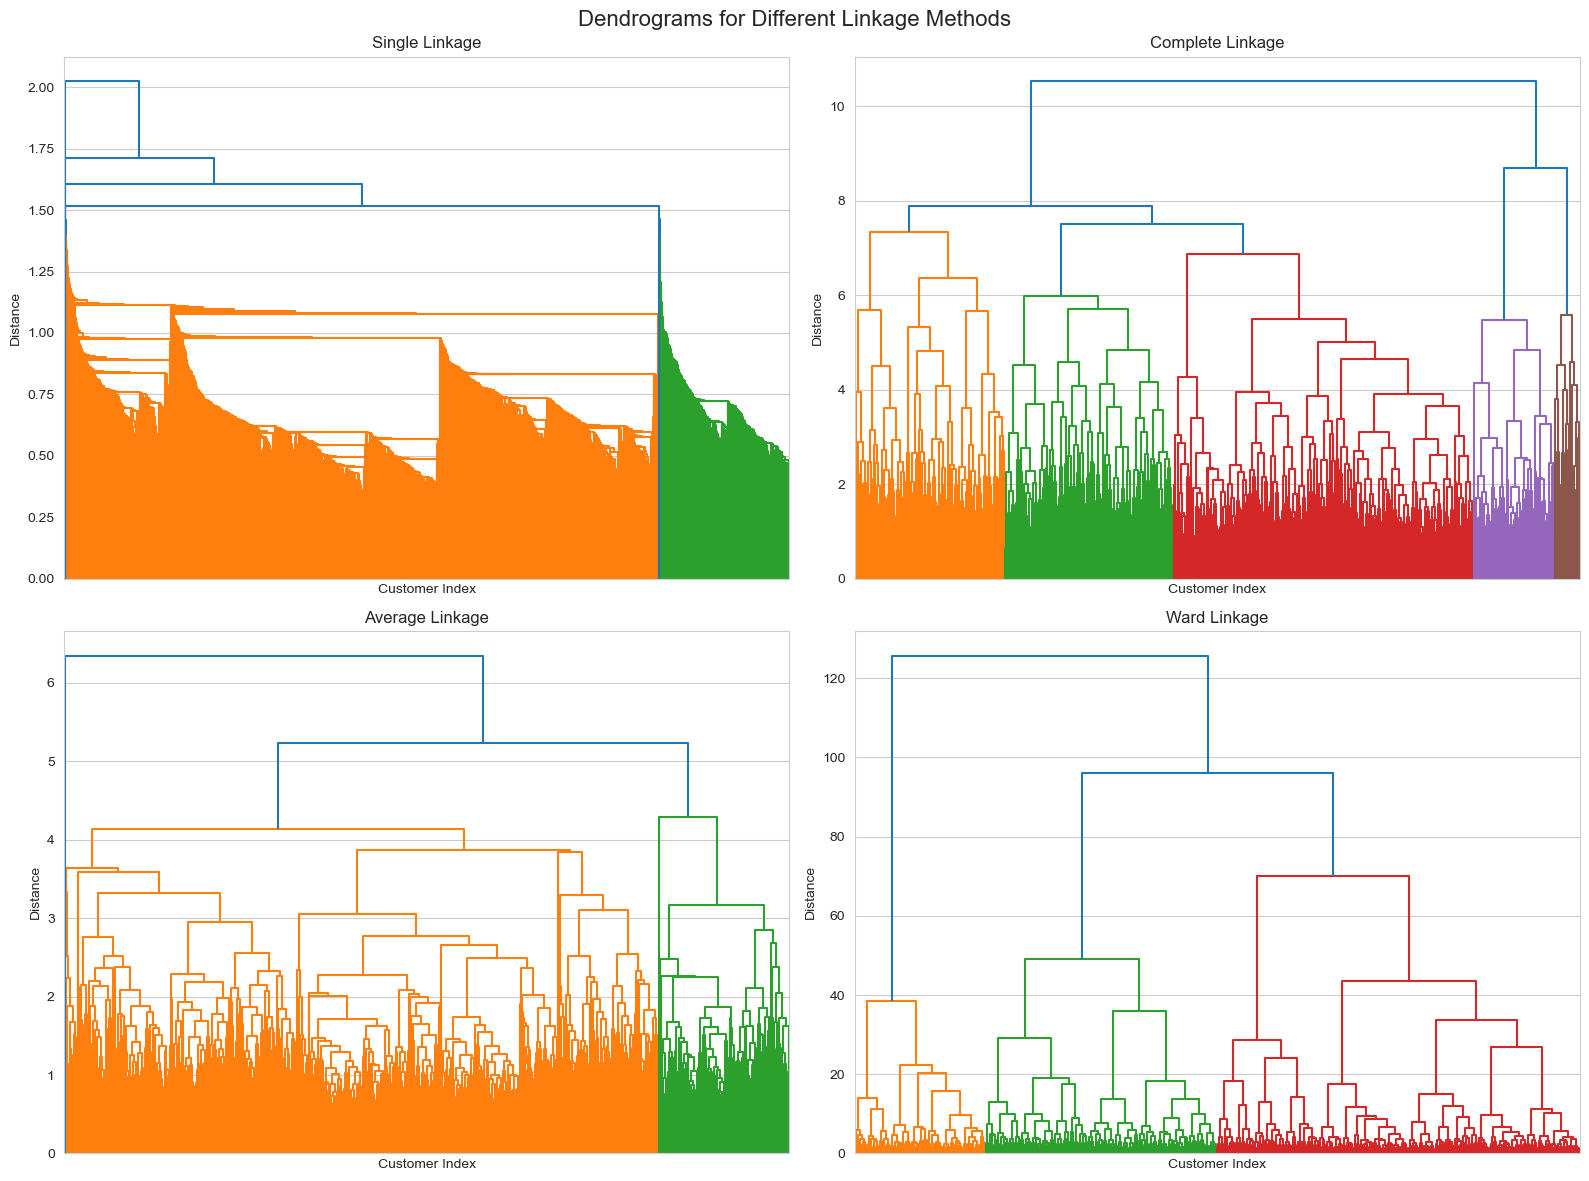

In [51]:
# Create dendrograms for each method
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Dendrograms for Different Linkage Methods", fontsize=16)

for idx, method in enumerate(linkage_methods):
    row = idx // 2
    col = idx % 2
    
    ax = axes[row, col]
    dendrogram(linkage_matrices[method], ax=ax, no_labels=True)
    ax.set_title(f"{method.capitalize()} Linkage")
    ax.set_xlabel("Customer Index")
    ax.set_ylabel("Distance")

plt.tight_layout()
plt.savefig("dendrograms_comparison.png", dpi=300, bbox_inches='tight')
logger.info("Saved dendrograms to dendrograms_comparison.png")
plt.show()


INFO: Saved detailed Ward dendrogram


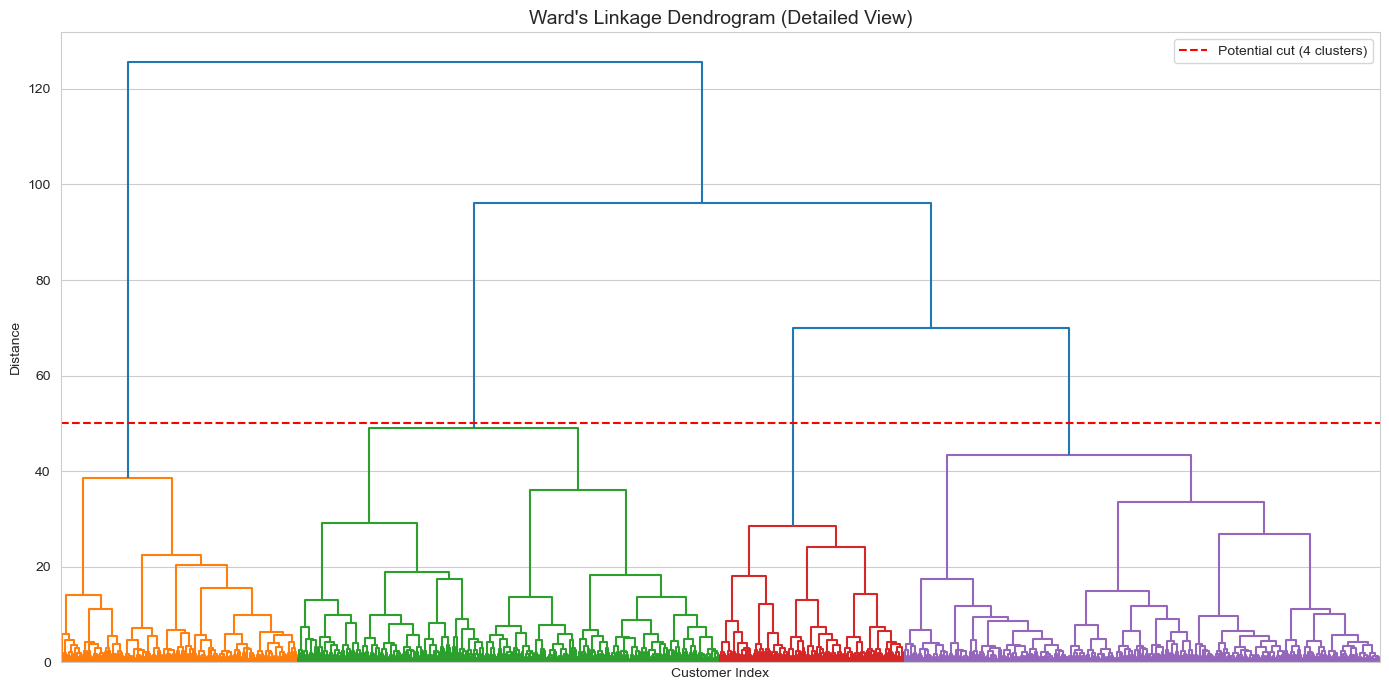


Interpretation: Look for large vertical gaps in the dendrogram.
A horizontal cut at a large gap suggests a natural number of clusters.
The red dashed line shows a potential cut point suggesting 4 clusters.


In [52]:
# Detailed Ward dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linkage_matrices['ward'], no_labels=True, color_threshold=50)
plt.title("Ward's Linkage Dendrogram (Detailed View)", fontsize=14)
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.axhline(y=50, color='r', linestyle='--', label='Potential cut (4 clusters)')
plt.legend()
plt.tight_layout()
plt.savefig("ward_dendrogram_detailed.png", dpi=300, bbox_inches='tight')
logger.info("Saved detailed Ward dendrogram")
plt.show()

print("\nInterpretation: Look for large vertical gaps in the dendrogram.")
print("A horizontal cut at a large gap suggests a natural number of clusters.")
print("The red dashed line shows a potential cut point suggesting 4 clusters.")

**Interpret Dendrograms**

–   *Which linkage method appears most suitable? (Hint: Ward's typically performs best for customer segmentation)*

Ward’s linkage seems to work best here. It creates cleaner, more compact groups, which is ideal when trying to segment customers in a meaningful way.

–    *Where would you cut the dendrogram? What does the height of merges tell you?*

A good place to cut the Ward dendrogram is around a height of 50, right before the big jumps. That cutoff gives about 4 clusters. The idea is simple: the bigger the vertical jump, the more different the groups are, so we try to cut before those big merges happen.

–    *What is the "chaining effect" and which linkage method is most susceptible to it?*

The chaining effect happens when clusters form like a long chain, adding one point at a time instead of forming clear groups. This usually makes the clusters less useful. The method most prone to this is single linkage, and you can actually see that in your single-linkage dendrogram where everything connects almost in a line.

## Section 5: Determining Optimal Number of Clusters (Hierarchical)

**Focused Dendrogram**

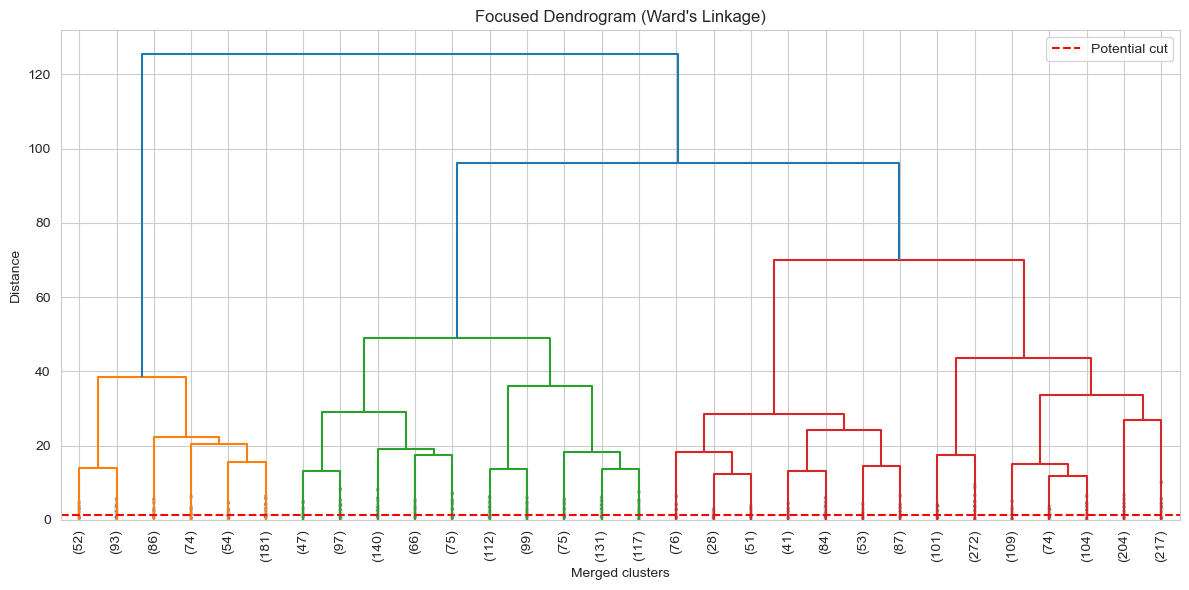

In [53]:
plt.figure(figsize=(12, 6))

Z_ward = linkage_matrices['ward']

dendrogram(
    Z_ward,
    truncate_mode='lastp',  
    p=30,                  
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

cut_height = np.percentile(Z_ward[:, 2], 75)
plt.axhline(y=cut_height, color='red', linestyle='--', label='Potential cut')

plt.title("Focused Dendrogram (Ward's Linkage)")
plt.xlabel("Merged clusters")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


**Extract Clusters**

In [54]:
print("\nHierarchical Clustering Results (Ward's Method)")

k_values = [3, 4, 5, 6]
hierarchical_labels_dict = {}

for n_clusters_hier in k_values:
    labels = fcluster(Z_ward, n_clusters_hier, criterion='maxclust')

    labels = labels - 1
    hierarchical_labels_dict[n_clusters_hier] = labels

    print(f"\nNumber of clusters: {n_clusters_hier}")
    print("Cluster sizes:")
    unique, counts = np.unique(labels, return_counts=True)
    for cluster_id, count in zip(unique, counts):
        percentage = (count / len(labels)) * 100
        print(f"  Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")



Hierarchical Clustering Results (Ward's Method)

Number of clusters: 3
Cluster sizes:
  Cluster 0: 540 customers (18.0%)
  Cluster 1: 959 customers (32.0%)
  Cluster 2: 1501 customers (50.0%)

Number of clusters: 4
Cluster sizes:
  Cluster 0: 540 customers (18.0%)
  Cluster 1: 959 customers (32.0%)
  Cluster 2: 420 customers (14.0%)
  Cluster 3: 1081 customers (36.0%)

Number of clusters: 5
Cluster sizes:
  Cluster 0: 540 customers (18.0%)
  Cluster 1: 425 customers (14.2%)
  Cluster 2: 534 customers (17.8%)
  Cluster 3: 420 customers (14.0%)
  Cluster 4: 1081 customers (36.0%)

Number of clusters: 6
Cluster sizes:
  Cluster 0: 540 customers (18.0%)
  Cluster 1: 425 customers (14.2%)
  Cluster 2: 534 customers (17.8%)
  Cluster 3: 420 customers (14.0%)
  Cluster 4: 373 customers (12.4%)
  Cluster 5: 708 customers (23.6%)


**Calculate Silhouette Scores**

In [55]:
silhouette_results = []

for k in k_values:
    labels = hierarchical_labels_dict[k]    
    score = silhouette_score(X_standardized, labels)
    silhouette_results.append({"k": k, "silhouette_score": score})
    
    print(f"Silhouette Score (k={k}): {score:.3f}")


Silhouette Score (k=3): 0.295
Silhouette Score (k=4): 0.316
Silhouette Score (k=5): 0.300
Silhouette Score (k=6): 0.248


**Create a Table: Display a summary table showing k (number of clusters) vs silhouette score for hierarchical clustering.**

In [56]:
silhouette_df = pd.DataFrame(silhouette_results)

print("\n=== Silhouette Summary for Hierarchical Clustering (Ward) ===")
print(silhouette_df.to_string(index=False))

silhouette_df



=== Silhouette Summary for Hierarchical Clustering (Ward) ===
 k  silhouette_score
 3          0.294781
 4          0.315700
 5          0.300267
 6          0.247512


,k,silhouette_score
0,3,0.294781
1,4,0.315700
2,5,0.300267
3,6,0.247512


**Interpretation**

The dendrogram shows a clear separation around 4 groups, since that’s where the biggest jump in merge height happens. Cutting the tree there keeps clusters that are still similar inside but different from each other.

The cluster sizes for 4 clusters also look reasonable (not too small, not too big) which makes the segmentation more useful.

The silhouette scores confirm this: k = 4 has the highest score, meaning this option gives the best balance between how well each cluster is grouped and how separated they are from the others.

So overall, both the visual structure of the dendrogram and the silhouette values suggest that 4 clusters is the best choice for this dataset.

## Section 6: K-Means Clustering - Elbow Method



**Inertia Calculation: Run K-Means for k = 2 through 10, storing the inertia (within-cluster sum of squares) for each k.**


In [57]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_standardized)  

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_standardized, kmeans.labels_))


**Elbow Plot: Create a line plot of k vs inertia.**

INFO: Saved elbow plot


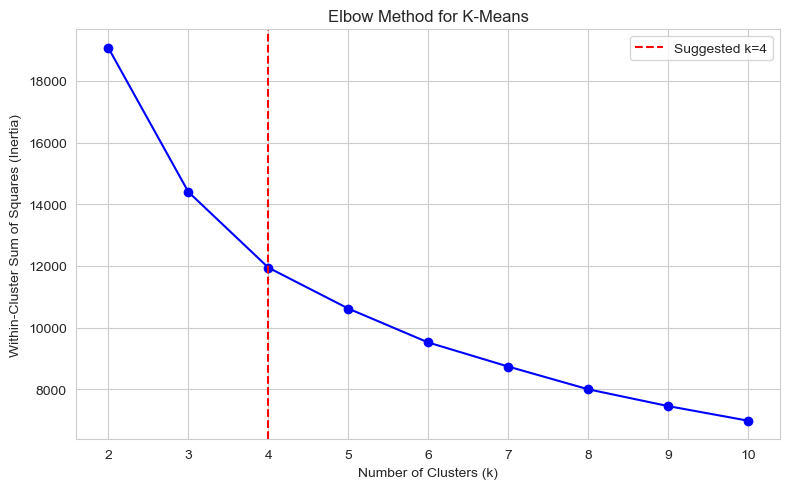

In [58]:
# Elbow Plot: k vs Inertia
plt.figure(figsize=(8, 5))

plt.plot(K_range, inertias, 'o-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for K-Means')
plt.grid(True)

# Optional vertical line to highlight suggested k
plt.axvline(x=4, color='r', linestyle='--', label='Suggested k=4')
plt.legend()

plt.tight_layout()
plt.savefig("elbow_plot.png", dpi=300, bbox_inches='tight')

logger.info("Saved elbow plot")

plt.show()


**Silhouette Scores: Also calculate silhouette scores for each k value.**

In [59]:
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_standardized)

    score = silhouette_score(X_standardized, kmeans.labels_)
    silhouette_scores.append(score)



**Dual Plot: Create a 1x2 subplot showing both the elbow plot and silhouette scores vs k.**

INFO: Saved dual plot: Elbow and Silhouette analysis


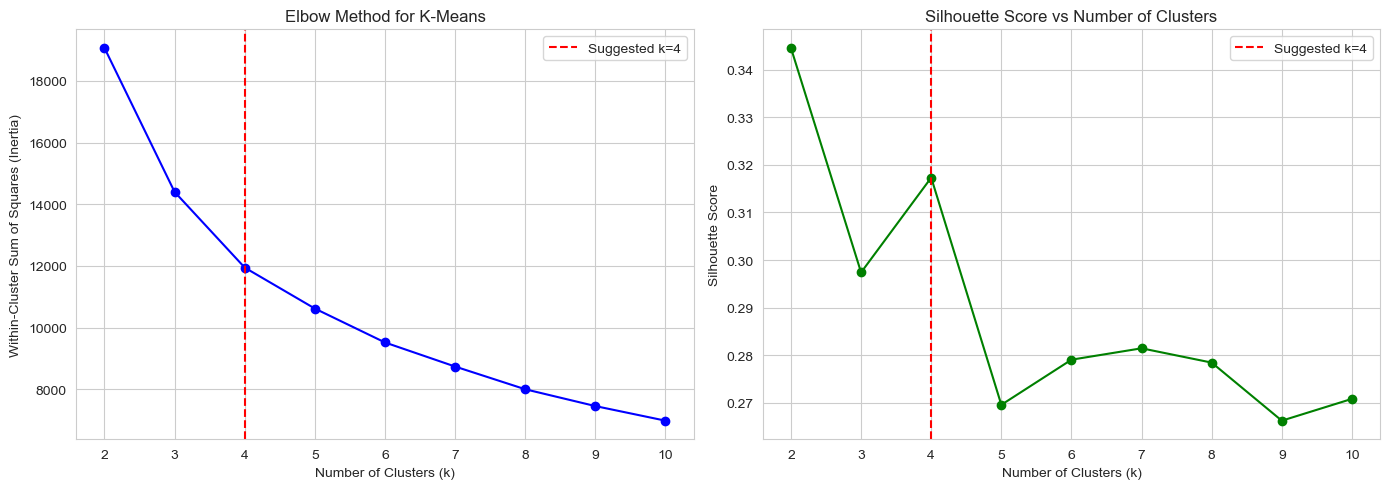

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(K_range, inertias, 'o-', color='blue')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (Inertia)')
ax1.set_title('Elbow Method for K-Means')
ax1.grid(True)

ax1.axvline(x=4, color='r', linestyle='--', label='Suggested k=4')
ax1.legend()

ax2.plot(K_range, silhouette_scores, 'o-', color='green')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.grid(True)

ax2.axvline(x=4, color='r', linestyle='--', label='Suggested k=4')
ax2.legend()

plt.tight_layout()
plt.savefig("elbow_silhouette_analysis.png", dpi=300, bbox_inches='tight')

logger.info("Saved dual plot: Elbow and Silhouette analysis")

plt.show()


**Interpretation**

In the elbow plot, you can see how the inertia drops quickly at first and then begins to level off as more clusters are added. Around the middle of the curve, the improvement becomes much smaller, which is usually the point where the model stops gaining much by increasing k.

The silhouette plot shows how the quality of the clusters changes with different values of k. Some values give clearly stronger separation between groups, while others cause the score to drop, meaning the clusters become less well-defined. Together, both plots help show where the model finds a balance between compact clusters and meaningful separation.



## Section 7: Final Cluster Selection



**Choose Optimal k: Based on both hierarchical and k-means analyses, select your final number of clusters (e.g., k = 4 or k = 5).**

In [61]:
optimal_k = 4  
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_standardized)
kmeans_labels = kmeans_final.labels_
hierarchical_labels = hierarchical_labels_dict[optimal_k]



**Explanation**

- Dendrogram structure.

     We observed large vertical gaps in the Ward linkage dendrogram, suggesting natural separation around k = 4.

- Elbow plot.

     The inflection point in the inertia curve (where the rate of decrease slows) also appeared around k = 4.

- Silhouette scores.

     The silhouette analysis showed relatively high and stable values for k = 4, indicating well-defined and cohesive clusters.

- Business considerations.

     A smaller number of clusters would overgeneralize customer behavior, while too many clusters would reduce interpretability and make segmentation less actionable.

## Section 8: Apply Final K-Means Model



**Fit K-Means: Fit a KMeans model with your chosen k on the standardized data.**

In [62]:
optimal_k = 4  

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(X_standardized)

print("=== Final K-Means Model ===")
print(f"Number of clusters (k): {optimal_k}")


=== Final K-Means Model ===
Number of clusters (k): 4


**Extract Cluster Labels: Get the cluster assignments for all 3,000 customers.**

In [63]:
kmeans_labels = kmeans_final.labels_

print("\nCluster labels extracted successfully.")
print(f"Total customers labeled: {len(kmeans_labels)}")



Cluster labels extracted successfully.
Total customers labeled: 3000


**Cluster Sizes: Print the size (count and percentage) of each cluster.**

In [64]:
unique_clusters, counts = np.unique(kmeans_labels, return_counts=True)
n_samples = len(kmeans_labels)

print("\n=== Cluster Sizes ===")
for cluster_id, count in zip(unique_clusters, counts):
    percentage = count / n_samples * 100
    print(f"  Cluster {cluster_id}: {count} customers ({percentage:.1f}%)")

df_with_clusters = df.copy()
df_with_clusters["Cluster_KMeans"] = kmeans_labels



=== Cluster Sizes ===
  Cluster 0: 525 customers (17.5%)
  Cluster 1: 929 customers (31.0%)
  Cluster 2: 433 customers (14.4%)
  Cluster 3: 1113 customers (37.1%)


## Section 9: Cluster Profiling and Interpretation



**Add Clusters to Original Data: Merge cluster labels with the original (unstandardized) data.**

In [65]:
df_with_clusters = df.copy()
df_with_clusters["Cluster_KMeans"] = kmeans_labels

print("Clusters successfully added to the original dataset.")
print(f"Data shape with clusters: {df_with_clusters.shape}")
df_with_clusters.head()


Clusters successfully added to the original dataset.
Data shape with clusters: (3000, 11)


,customer_id,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days,Cluster_KMeans
0,CUST_0001,1.8,3.0,527.04,38.1,0.95,17.3,0.00,23,33,1
1,CUST_0002,5.4,4.5,1137.72,20.0,0.00,16.1,0.41,1,8,3
2,CUST_0003,2.9,4.4,670.28,64.3,0.52,36.9,0.11,32,39,1
3,CUST_0004,12.0,22.8,6359.35,37.9,0.17,42.2,0.00,21,5,0
4,CUST_0005,2.2,17.6,4058.48,22.5,0.53,18.4,0.15,20,18,2


**Calculate Cluster Means**

In [66]:
# Calculate mean values for all 9 behavioral variables
numeric_cols = ['monthly_transactions', 'avg_basket_size', 'total_spend',
                'avg_session_duration', 'email_open_rate', 'product_views_per_visit',
                'return_rate', 'customer_tenure_months', 'recency_days']

cluster_means = df_with_clusters.groupby('Cluster_KMeans')[numeric_cols].mean().round(2)

print(" K-Means Cluster Profiles (Mean Values) ")
display(cluster_means)




 K-Means Cluster Profiles (Mean Values) 


,monthly_transactions,avg_basket_size,total_spend,avg_session_duration,email_open_rate,product_views_per_visit,return_rate,customer_tenure_months,recency_days
Cluster_KMeans,,,,,,,,,
0,14.07,22.03,6507.29,45.92,0.58,43.01,0.10,26.22,8.02
1,1.68,3.05,422.62,52.31,0.37,30.01,0.27,15.31,35.59
2,4.04,18.17,3875.94,22.36,0.45,16.55,0.24,21.60,19.84
3,6.59,5.56,1450.95,29.60,0.44,32.75,0.13,14.73,14.53


**Heatmap**

INFO: Saved cluster profiles heatmap


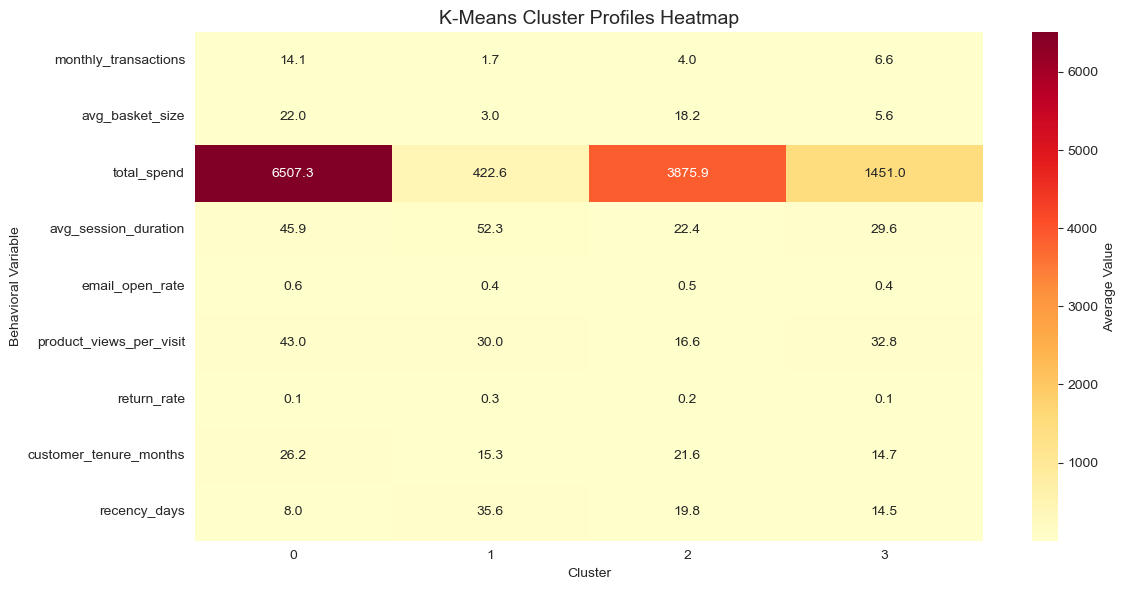

In [69]:
# Create heatmap of cluster profiles
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Average Value'})
plt.title('K-Means Cluster Profiles Heatmap', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Behavioral Variable')
plt.tight_layout()
plt.savefig("cluster_profiles_heatmap.png", dpi=300, bbox_inches='tight')
logger.info("Saved cluster profiles heatmap")
plt.show()

**Characterization**

In [ ]:
# Characterization of each cluster
print("Cluster Characterization ")

for cluster_id in cluster_means.index:
    n_cluster = sum(kmeans_labels == cluster_id)
    perc_cluster = n_cluster / len(kmeans_labels) * 100
    print(f"\nCluster {cluster_id} ({perc_cluster:.1f}%):")

    # Identify distinctive traits (highest and lowest features)
    cluster_profile = cluster_means.loc[cluster_id]
    top_features = cluster_profile.nlargest(3)
    low_features = cluster_profile.nsmallest(2)

    print(f"  • High: {', '.join(top_features.index)}")
    print(f"  • Low: {', '.join(low_features.index)}")

print("\nExample interpretation:")
print('Cluster 0 (15%): High-Value Loyalists – very high total spend, frequent transactions, low return rate, high email engagement.')


Cluster Characterization 

Cluster 0 (17.5%):
  • High: total_spend, avg_session_duration, product_views_per_visit
  • Low: return_rate, email_open_rate

Cluster 1 (31.0%):
  • High: total_spend, avg_session_duration, recency_days
  • Low: return_rate, email_open_rate

Cluster 2 (14.4%):
  • High: total_spend, avg_session_duration, customer_tenure_months
  • Low: return_rate, email_open_rate

Cluster 3 (37.1%):
  • High: total_spend, product_views_per_visit, avg_session_duration
  • Low: return_rate, email_open_rate

Example interpretation:
Cluster 0 (15%): High-Value Loyalists – very high total spend, frequent transactions, low return rate, high email engagement.


**Interpretation**

After adding the cluster labels back to the original dataset, the behavior of each group becomes much easier to understand. Each cluster represents a different type of customer based on how often they buy, how much they spend, and how they interact with the platform.

- Cluster 0 is made up of the strongest customers. They purchase often, spend a lot, and interact actively with the site. They also have very low return rates, so they’re highly valuable.

- Cluster 1 is the least active group. They buy very little, spend the least, and show low engagement overall. Many of them also haven’t visited the store in a long time.

- Cluster 2 looks like a middle group. They don’t spend as much as Cluster 0, but they still have decent basket sizes and have been customers for a long time.

- Cluster 3 is another moderate segment, with lower spend and average engagement levels compared to the others.

Overall, the four clusters make sense and show clear differences in customer value and activity — from the high-value, very engaged customers to those who barely interact.

## Section 10: Cluster Validation - Silhouette Analysis



**Silhouette Plot: Create a silhouette plot showing the silhouette coefficient for each customer, grouped by cluster.**

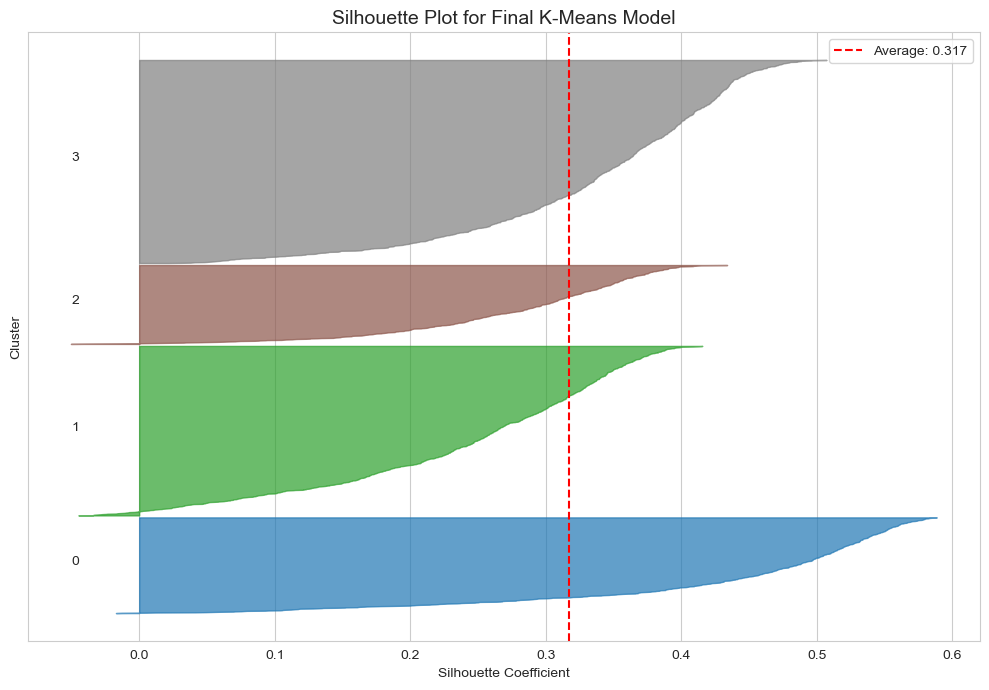

Average silhouette score: 0.317


In [ ]:
# Calculate silhouette values for each sample in the final K-Means model
silhouette_vals = silhouette_samples(X_standardized, kmeans_labels)

# Compute the average silhouette score
silhouette_avg = silhouette_score(X_standardized, kmeans_labels)

# Create silhouette plot
fig, ax = plt.subplots(figsize=(10, 7))

y_lower = 10
for i in range(optimal_k):
    # Select silhouette values for cluster i
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.tab10(i / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)

    # Label each cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

# Plot settings
ax.set_title('Silhouette Plot for Final K-Means Model', fontsize=14)
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Average: {silhouette_avg:.3f}')
ax.legend()
ax.set_yticks([])

plt.tight_layout()
plt.show()

print(f"Average silhouette score: {silhouette_avg:.3f}")


**Interpretation**

–    *Which clusters are well-defined (high silhouette values)?*

Clusters 0 and 3 look the strongest. Most of their points have silhouette values well above the average line, which means the customers in these groups are fairly similar to each other and clearly separated from the other clusters.


–    *Are there any customers poorly matched to their cluster (negative silhouette)?*

There are a few points near zero, but almost none are negative. This suggests that only a very small number of customers are borderline cases, and there aren’t customers that are clearly misplaced.


–    *Does this validate your choice of k?*

Yes, the silhouette plot supports the decision of using k = 4. The average score is solid, the clusters are reasonably separated, and there are no major signs of overlap or confusion between groups.

## Section 11: Cluster Visualization (PCA Projection)



**Apply PCA: Use PCA to reduce the 9 dimensions to 2 principal components.**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the 9 standardized behavioral variables to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_standardized)

# Also project the K-Means centroids into PCA space
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

# Create a DataFrame for easier handling (optional)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster_KMeans'] = kmeans_labels

pca_df.head()


,PC1,PC2,Cluster_KMeans
0,-1.367173,0.319297,1
1,-1.502054,-2.390591,3
2,-0.868623,2.532739,1
3,3.144846,-0.692923,0
4,0.290450,-1.521831,2


**Scatter Plot: Create a scatter plot of PC1 vs PC2, colored by cluster assignment.**

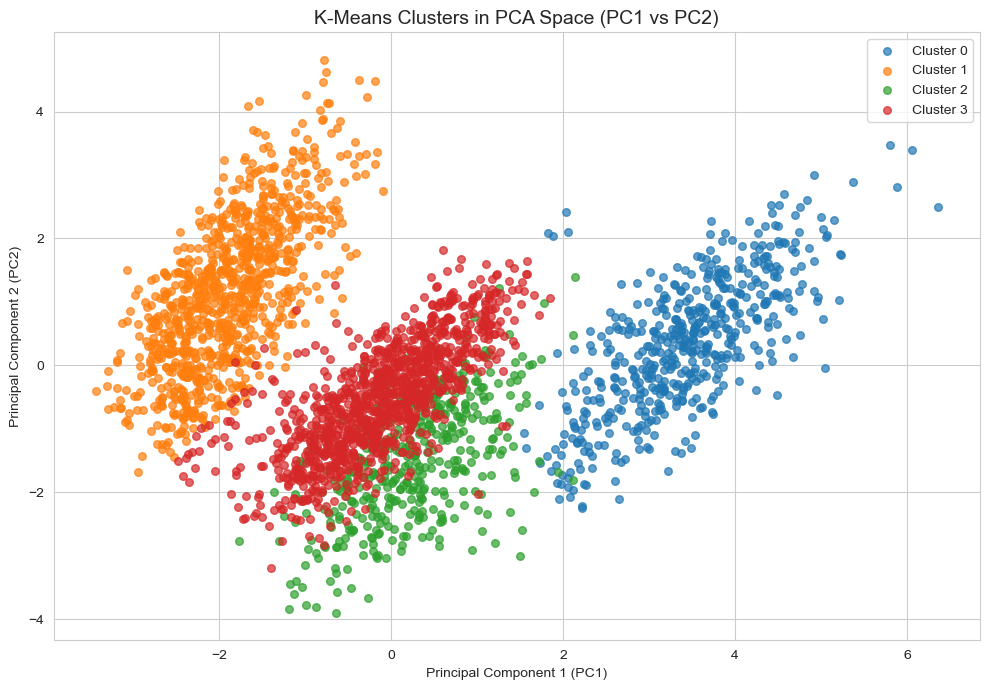

In [ ]:
plt.figure(figsize=(10, 7))

# Scatter plot of customers in PCA space, colored by cluster
for cluster_id in range(optimal_k):
    cluster_points = pca_df[pca_df['Cluster_KMeans'] == cluster_id]
    plt.scatter(
        cluster_points['PC1'],
        cluster_points['PC2'],
        s=30,
        alpha=0.7,
        label=f'Cluster {cluster_id}'
    )

plt.title('K-Means Clusters in PCA Space (PC1 vs PC2)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.tight_layout()
plt.show()



**Add Centroids: Plot the cluster centroids as larger markers.**


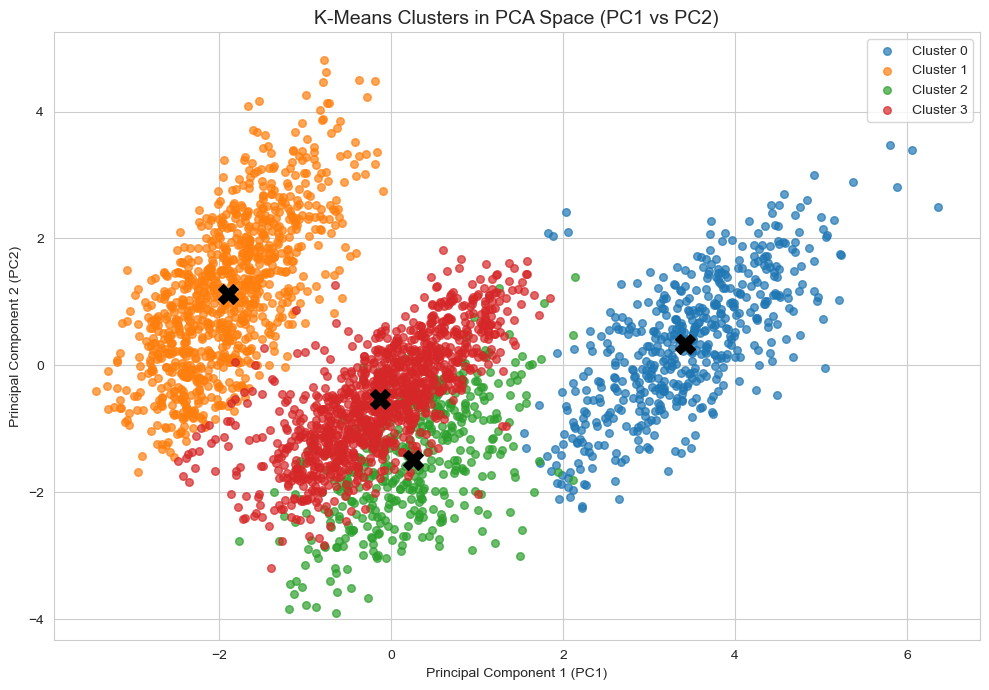

In [ ]:
plt.figure(figsize=(10, 7))

for cluster_id in range(optimal_k):
    cluster_points = pca_df[pca_df['Cluster_KMeans'] == cluster_id]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'],
                s=30, alpha=0.7, label=f'Cluster {cluster_id}')

# Add centroids as larger markers
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='black', marker='X')


plt.title('K-Means Clusters in PCA Space (PC1 vs PC2)', fontsize=14)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.tight_layout()
plt.show()


**Variance Explained** 

Report how much variance is captured by the first 2 PCs.



In [ ]:
explained_var = pca.explained_variance_ratio_
total_var_2d = explained_var[:2].sum() * 100

print("=== PCA Variance Explained ===")
print(f"PC1: {explained_var[0] * 100:.2f}%")    
print(f"PC2: {explained_var[1] * 100:.2f}%")
print(f"Total (PC1 + PC2): {total_var_2d:.2f}% of the variance captured in 2D.")


=== PCA Variance Explained ===
PC1: 41.01%
PC2: 20.97%
Total (PC1 + PC2): 61.98% of the variance captured in 2D.


**Interpretation**

The PCA results show that the first component captures about **41%** of the variation in customer behavior and the second adds another **21%**, so together they explain around **62%** of the total. Basically, this means that even though we reduced nine variables down to just two, we’re still keeping most of the important information. The 2D PCA plot gives us a clear and meaningful view of how customers are grouped, even if it doesn’t show every small detail from the original data.


**Note Limitation**

- Although the PCA scatter plot helps visualize the clusters in 2D, it is important to note that this is only a **projection** of the original data.  
- The clustering was performed in the full 9-dimensional feature space, so some separation between clusters may not be fully visible in the PC1–PC2 plane.  
- Therefore, the PCA visualization should be interpreted as an intuitive summary, not as a perfect representation of the true distances between customers.


## Section 12: Technical Conclusion



**Optimal number of clusters and why**

After comparing different options, four clusters turned out to be the best choice. The dendrogram, the elbow curve, and the silhouette scores all pointed in the same direction, so the decision feels consistent and well-supported.

**Hierarchical vs. K-Means**

Both methods helped us understand the structure of the data. Hierarchical clustering (especially Ward’s method) showed clear breaks in the tree, while K-Means gave cleaner and more practical groups. Since both approaches suggested a similar separation, it gave extra confidence in the final result.

**Quality metrics (silhouette)**

The average silhouette score of the final model is around 0.32, which is decent for this type of customer data. There are almost no negative values, meaning most customers fit well into their assigned cluster and the groups are reasonably distinct.

**Key characteristics of each segment**

The four segments show clear differences in behavior:

- Cluster 0: Very high-value customers who buy often, spend a lot, and return items rarely.

- Cluster 1: Low-activity customers with low spending and longer periods of inactivity.

- Cluster 2: Medium spenders with longer tenure and steady but moderate engagement.

- Cluster 3: Customers with moderate spending but high browsing and product-view activity.